# 7章 初等解析問題を解く

In [1]:
# 三角関数

import math
math.sin(math.pi / 2)

1.0

In [3]:
import sympy, math

sympy.sin(math.pi / 2)

1.00000000000000

In [5]:
import sympy, math
from sympy import Symbol

theta = Symbol("theta")
# math.sin(theta) + math.sin(theta) # => エラー

sympy.sin(theta) + sympy.sin(theta)

2*sin(theta)

In [6]:
from sympy import sin, solve, Symbol

u = Symbol("u")
t = Symbol("t")
g = Symbol("g")
theta = Symbol("theta")
solve(u * sin(theta) - g * t, t)

[u*sin(theta)/g]

In [9]:
# 符号

x = Symbol("x", positive = True)
# 他にもreal, integer, complex, imaginaryを指定できる
# 仮定と呼ばれるらしい

if (x + 5) > 0:
    print("positive")
else :
    print("negative")

positive


In [13]:
# 極限

from sympy import Limit, Symbol, S

x = Symbol("x")
l = Limit(1/x, x, S.Infinity)
l.doit()

0

In [14]:
# 連続複利

from sympy import Limit, Symbol, S
n = Symbol("n")
Limit((1 + 1 /n) ** n, n, S.Infinity).doit()

E

In [15]:
from sympy import Limit, Symbol, S
n = Symbol("n")
p = Symbol("p", positive = True)
r = Symbol("r", positive = True)
t = Symbol("t", positive = True)

Limit(p * (1 + r /n) ** (n * t), n, S.Infinity).doit()

p*exp(r*t)

In [23]:
# 瞬間変化率

from sympy import Symbol, Limit, init_printing, pprint

init_printing()

t = Symbol("t")
st = 5 *t ** 2 + 2 * t +8

t1 = Symbol("t1")
dt = Symbol("dt")
st1 = st.subs({t:t1})
dst1= st.subs({t: t1 + dt})


pprint(st)
f = (dst1 - st1) / (dt)
pprint(f)
Limit(f, dt, 0).doit()

   2          
5⋅t  + 2⋅t + 8
           2              2
2⋅dt - 5⋅t₁  + 5⋅(dt + t₁) 
───────────────────────────
             dt            


In [29]:
# 微分

from sympy import Symbol, Derivative

t = Symbol("t")
st = 5 *t ** 2 + 2 * t +8

d = Derivative(st, t)

t1 = Symbol("t1")
d.doit().subs({t:t1})

In [33]:
%matplotlib inline

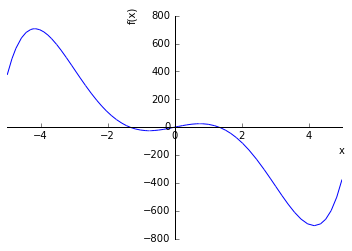

[-sqrt(-sqrt(71) + 9), sqrt(-sqrt(71) + 9), -sqrt(sqrt(71) + 9), sqrt(sqrt(71) + 9)]
127.661060789073
-127.661060789073
-703.493179468151
703.493179468151
----------------------------------------------------------------
375.000000000000
-375.000000000000
25.0846626340294
705.959460380365
-25.0846626340294
-705.959460380365


In [47]:
from sympy.plotting import plot
from sympy import Symbol, Derivative

x = Symbol("x")
f = x ** 5 - 30 * x **3 + 50 * x
plot(f, (x, -5, 5))

d1 = Derivative(f, x).doit()
p = solve(d1)
print(p)

d2 = Derivative(f, x, 2).doit()
print(d2.subs({x: p[0]}).evalf())
print(d2.subs({x: p[1]}).evalf())
print(d2.subs({x: p[2]}).evalf())
print(d2.subs({x: p[3]}).evalf())

# マイナスのものは加速度がマイナスなので、極大点
# 逆にプラスのものは極小点

print("----------------------------------------------------------------")
x_min = -5
x_max = 5

# 末端
print(f.subs({x:x_min}).evalf())
print(f.subs({x:x_max}).evalf())

# 最大値候補
print(f.subs({x:p[1]}).evalf())
print(f.subs({x:p[2]}).evalf()) # => 最大

# 最小値候補
print(f.subs({x:p[0]}).evalf())
print(f.subs({x:p[3]}).evalf()) # => 最小


勾配上昇法めんどくさそうなのでパス

In [49]:
# 積分

from sympy import Integral, Symbol

x = Symbol("x")
k = Symbol("k")
Integral(k * x, x).doit()

In [50]:
from sympy import Integral, Symbol

x = Symbol("x")
k = Symbol("k")
Integral(k * x, (x, 0, 2)).doit()

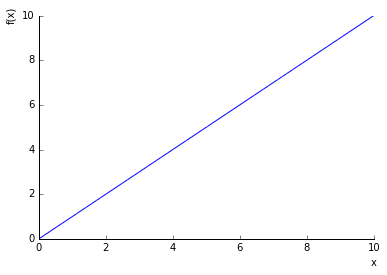

In [51]:
from sympy import Integral, Symbol
from sympy.plotting import plot

x = Symbol("x")
f = x
plot(f, (x, 0, 10))
Integral(f, (x, 2, 4)).doit()

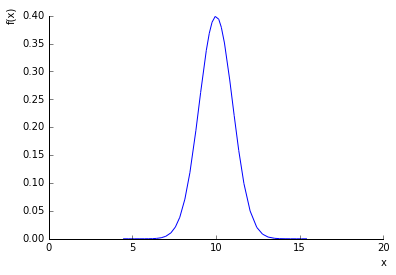

In [53]:
# 生徒の成績を0 ~ 20としている (x)
# 生徒が11~12の点数を取る確率
# 一様確率と仮定して考える

from sympy import Symbol, exp, sqrt, pi, Integral
from sympy.plotting import plot

x = Symbol("x")
p = exp(-(x - 10)**2 / 2)/ sqrt(2*pi)
plot(p, (x, 0, 20))
Integral(p, (x, 11, 12)).doit().evalf()

In [54]:
from sympy import Symbol, exp, sqrt, pi, Integral, S
x = Symbol("x")
p = exp(-(x - 10)**2 / 2)/ sqrt(2*pi)
Integral(p, (x, S.NegativeInfinity, S.Infinity)).doit().evalf()

# プログラミングチャレンジ

In [91]:
# 関数の連続性

from sympy import Symbol, Limit

x = Symbol("x")
dx = Symbol("dx", positive=True)
f = 1 /x
positive_limit = Limit((f.subs({x: dx}) - f.subs({x: 0}))/dx, dx, 0).doit()
negative_limit = Limit((f.subs({x : 0}) - f.subs({x: -dx})) / dx, dx, 0).doit()

positive_limit
negative_limit

# あってるのかわからんくなってきた

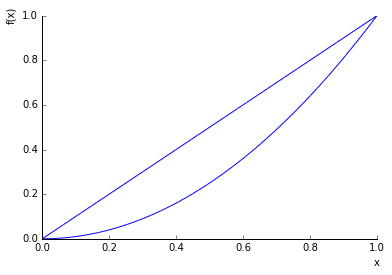

In [99]:
# 2曲線で囲まれた領域の面積
from sympy import Symbol, Integral
from sympy.plotting import plot

x = Symbol("x")
f = x
g = x ** 2
plot(f,g, (x, 0, 1))

Integral((f - g), (x, 0, 1)).doit()

In [103]:
from sympy import Symbol, Integral, Derivative, sqrt
from sympy.plotting import plot

y = 2 * x **2 + 3 * x + 1
dydx = Derivative(y, x).doit()
l = sqrt(1 + dydx**2)
L = Integral(l, (x, -5, 10))
L.doit().evalf()